In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

C:\Users\Man\AppData\Local\Temp\ipykernel_19432\2688871362.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


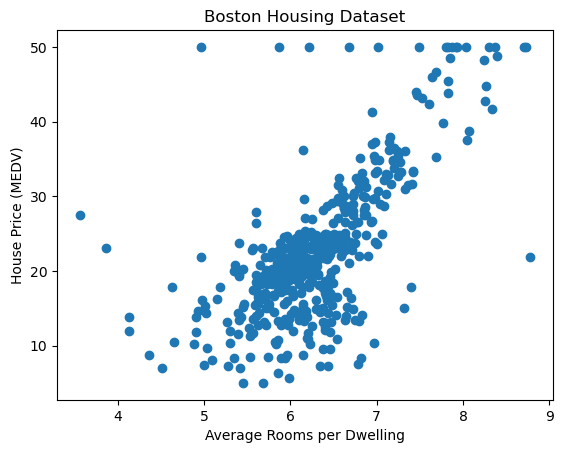

In [2]:
# 波士顿数据集的原始URL（可能需要科学上网）
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# 提取第5列（'RM'：平均房间数）和目标值（'MEDV'：房价中位数）
x = data['RM'].values
y = data['MEDV'].values

plt.scatter(x, y)
plt.xlabel('Average Rooms per Dwelling')
plt.ylabel('House Price (MEDV)')
plt.title('Boston Housing Dataset')
plt.show()

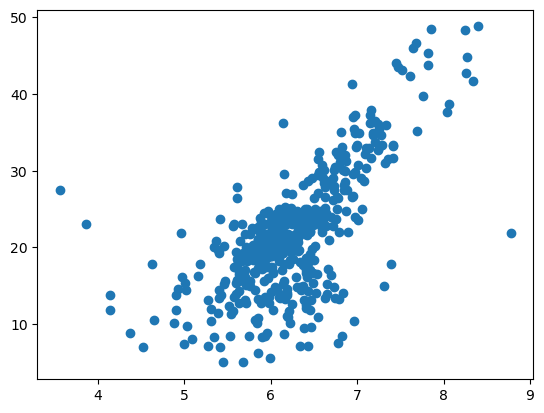

In [3]:
x = x[y < 50]
y = y[y < 50]
plt.scatter(x,y)
plt.show()

#### 简单线性回归

In [ ]:
# 建立模型
X_train, X_test, y_train, y_test = train_test_split(x, y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(x)
X_train = X_train.reshape(-1,1) # 转换为一维数组
X_test = X_test.reshape(-1,1)
print(x)
lr_reg = LinearRegression() # 创建线性回归模型
lr_reg.fit(X_train, y_train) # 训练模型
print(lr_reg)
y_pred = lr_reg.predict(X_test)
print(y_test)
print(y_pred)


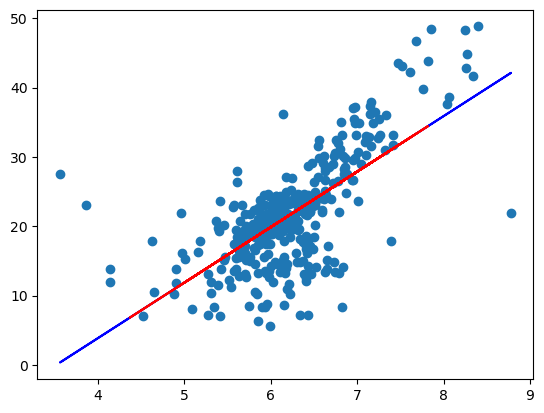

[8.00033672]
-28.132351404719312


In [5]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr_reg.predict(X_train), color='blue') # 训练集预测值
plt.plot(X_test,lr_reg.predict(X_test), color='red') # 预测值
plt.show()
print(lr_reg.coef_) # 斜率
print(lr_reg.intercept_) # 截距

#### 多元线性回归

In [6]:
# 波士顿数据集的原始URL（可能需要科学上网）
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
boston = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# 正确提取特征和目标值
X = boston.drop('MEDV', axis=1).values  # 所有特征列
y = boston['MEDV'].values  # 目标列

# 划分训练集和测试集（修正拼写错误）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

# 打印形状
print("原始数据形状:", X.shape)
print("训练集形状:", X_train.shape)
print("测试集形状:", X_test.shape)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
print("训练集的R^2:", lr_reg.score(X_train, y_train))
print("测试集的R^2:", lr_reg.score(X_test, y_test))
print("模型参数:", lr_reg.coef_)
print("模型截距:", lr_reg.intercept_)

# 特征重要性分析
feature_names = columns[:-1]  # 排除目标列MEDV
sorted_idx = np.argsort(lr_reg.coef_)

print("\nDataFrame的列名:", boston.columns.tolist())
print("\n特征重要性排序(从小到大):")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {lr_reg.coef_[idx]:.4f}")


# 
y_test_pred = lr_reg.predict(X_test)
print("测试集的MSE:", mean_squared_error(y_test, y_test_pred)) # 均方误差
print("测试集的MAE:", mean_absolute_error(y_test, y_test_pred)) # 平均绝对误差
print("测试集的MSE:", mean_squared_error(y_test, y_test_pred)**0.5) # 均方根误差

C:\Users\Man\AppData\Local\Temp\ipykernel_19432\334033025.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


原始数据形状: (506, 13)
训练集形状: (404, 13)
测试集形状: (102, 13)
训练集的R^2: 0.7448421620432975
测试集的R^2: 0.7022974023980292
模型参数: [-1.08007292e-01  5.03745592e-02  5.12392268e-02  1.70571984e+00
 -1.79371619e+01  3.65447692e+00 -7.46249686e-03 -1.67272528e+00
  3.15959664e-01 -1.38621429e-02 -9.20084997e-01  8.34939033e-03
 -5.62793838e-01]
模型截距: 39.43531301562338

DataFrame的列名: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

特征重要性排序(从小到大):
NOX: -17.9372
DIS: -1.6727
PTRATIO: -0.9201
LSTAT: -0.5628
CRIM: -0.1080
TAX: -0.0139
AGE: -0.0075
B: 0.0083
ZN: 0.0504
INDUS: 0.0512
RAD: 0.3160
CHAS: 1.7057
RM: 3.6545
测试集的MSE: 19.0468908701783
测试集的MAE: 3.3607057968944694
测试集的MSE: 4.364274380716489


#### 多项式线性回归

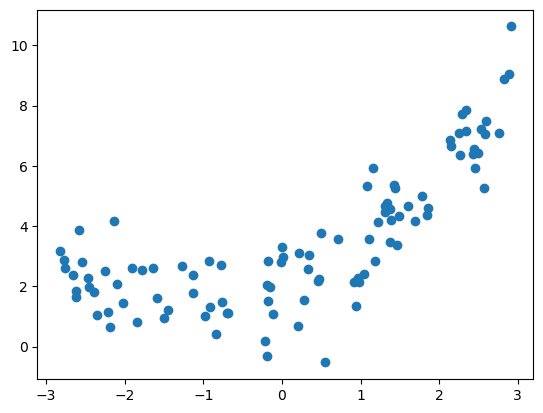

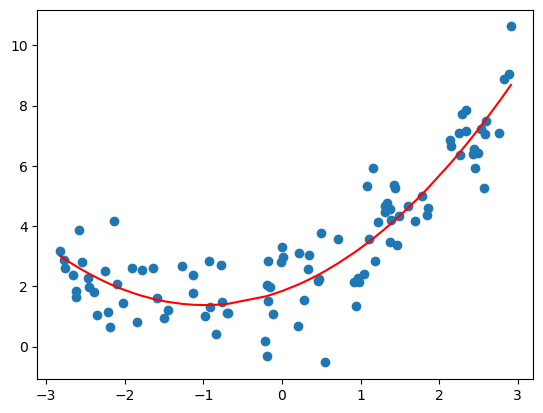

测试集的MSE: 0.5900008256253975
测试集的MAE: 0.6488322610325767
测试集的MSE: 0.7681151122230296


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures # 多项式特征提取
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.model_selection import train_test_split # 训练集测试集划分

x = np.random.uniform(-3, 3, 100)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, 100) # 加入噪声

plt.scatter(x, y)
plt.show()

poly = PolynomialFeatures(degree=2) # 多项式特征提取
X_trans = x.reshape(-1, 1) # 转换为二维数组
x2 = poly.fit_transform(X_trans) # 训练
# 划分数据集
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)
# 训练模型
lin_reg = LinearRegression() # 线性回归
lin_reg.fit(x2_train, y_train) # 训练
#y_pred = lin_reg.predict(x2_test) # 预测
y_pred2 = lin_reg.predict(x2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_pred2[np.argsort(x)], color='r')
plt.show()

y_test_pred = lin_reg.predict(x2_test)
print("测试集的MSE:", mean_squared_error(y_test, y_test_pred)) # 均方误差
print("测试集的MAE:", mean_absolute_error(y_test, y_test_pred)) # 平均绝对误差
print("测试集的均方根误差:", mean_squared_error(y_test, y_test_pred)**0.5) # 均方根误差

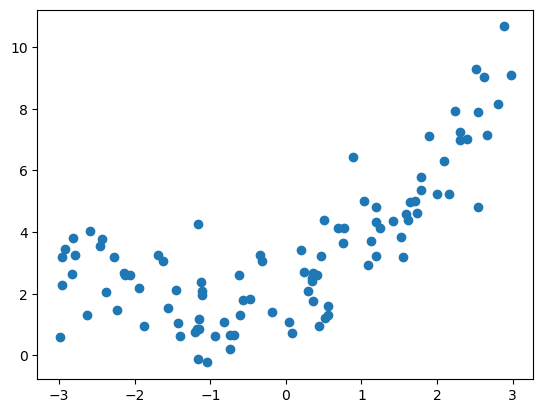

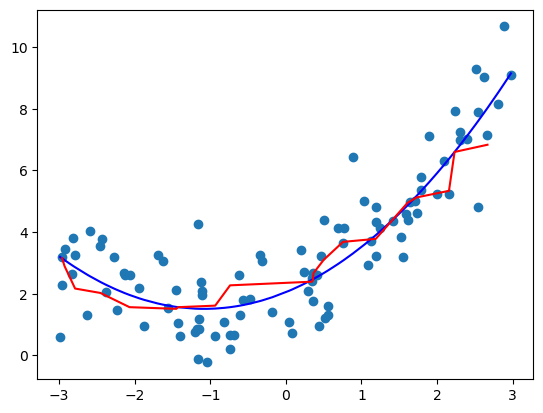

测试集的MSE: 0.7243187367642708
测试集的MAE: 0.6631057643095968
测试集的均方根误差: 0.8510691727258548


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures  # 多项式特征提取
from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.model_selection import train_test_split  # 训练集测试集划分
from sklearn.metrics import mean_squared_error, mean_absolute_error  # 导入评估指标

x = np.random.uniform(-3, 3, 100)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, 100)  # 加入噪声

plt.scatter(x, y)
plt.show()

poly = PolynomialFeatures(degree=2)  # 多项式特征提取
X_trans = x.reshape(-1, 1)  # 转换为二维数组
# 多项式特征转换
x2 = poly.fit_transform(X_trans)
# 划分数据集
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)
# 训练模型
lin_reg = LinearRegression()  # 线性回归
lin_reg.fit(x2_train, y_train)  # 训练
y_pred = lin_reg.predict(x2_test)  # 预测
# 画图
plt.scatter(x, y)
# 注意：x2_train是多项式特征矩阵，需要用原始x值排序绘图
plt.plot(np.sort(x), lin_reg.predict(poly.transform(np.sort(x).reshape(-1, 1))), color='b')
plt.plot(np.sort(x[x2_test[:,1].argsort()]), y_pred[x2_test[:,1].argsort()], color='r')
plt.show()

y_test_pred = lin_reg.predict(x2_test)
print("测试集的MSE:", mean_squared_error(y_test, y_test_pred))  # 均方误差
print("测试集的MAE:", mean_absolute_error(y_test, y_test_pred))  # 平均绝对误差
print("测试集的均方根误差:", mean_squared_error(y_test, y_test_pred)** 0.5)  # 均方根误差

In [5]:
import numpy as np

arr = np.array([1,2,3,4,5,6,7,8,9,10])
print(arr[[0,2,4,6,8]])

[1 3 5 7 9]
